In [1]:
# This Pandas script conducts a sentiment analysis of the most recent 100 tweets posted by 5 major news organizations:
#   BBC, CBS, CNN, Fox and New York Times.
# Sentiment analysis is performed using the VADER library.
# Results of the analysis are displayed using a scatter plot of all 500 tweets, as well as a bar chart reflecting
#   the averge compound score of all (100) tweets for a given news organization.
# In the comments below, news organization == news outlet

# Observations
1. The overall mood of news at the time this script was run is fairly POSITIVE
2. Running this script at different times, and days, produces dramatically different results
    - This is expted given that the tweets reflect the mood of prevailing news as of the time of running this script
3. I found that Fox News and New York Times generally tend to be more negative, while BBC and CBS are more positive
    - This could be a reflection of the followers of each outlet, and their general political bent

In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
import time
import yaml

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Retrieve Twitter API Keys
TWITTER_CONFIG_FILE = 'auth.yaml'
with open(TWITTER_CONFIG_FILE, 'r') as config_file:
    config = yaml.load(config_file)
consumer_key = config['twitter']['consumer_key']
consumer_secret = config['twitter']['consumer_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# This code block retrieves the most recent 100 tweets for each of the 5 news outlets, determines the sentiment of each
#    tweet using VADER analysis, and stores the results for subsequent plotting.
#
# Declare global variables
target_outlets = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]  # list of Twiter handles for news organziations of interest
outlet_color = ["lightblue", "green", "red", "blue", "gold"]       # color associated with each outlet
avg_compound_score = []

# Initialize other global variables
color = 0
plt.figure(figsize=(12,8))  # enlarge figure size to present a bigger plot

# Loop through all the news outlets of interest
for outlet in target_outlets:
    # Declare lists for holding sentiment data for a given news outlet, so the lists are reset
    tweet_count = []
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    counter = 1  # variable to track tweet number

    # Loop through 5 pages of tweets (for a total 100 tweets) for a given news outlet
    for x in range(5):
        # Get all tweets from home feed
        public_tweets = api.user_timeline(outlet)    
        # Loop through all the tweets 
        for tweet in public_tweets:
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]        
            # Now store sentiment values for each tweet into an array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            tweet_count.append(counter)
            # Increment the tweet counter
            counter += 1
    # Prepare a scatter plot of sentiment (polarity) of all tweets for the current news outlet
    plt.scatter(tweet_count, compound_list, marker='o', label=outlet, color=outlet_color[color])
    avg_compound_score.append(np.mean(compound_list)) # store the average of all tweets for the next code block (bar chart)
    color += 1    

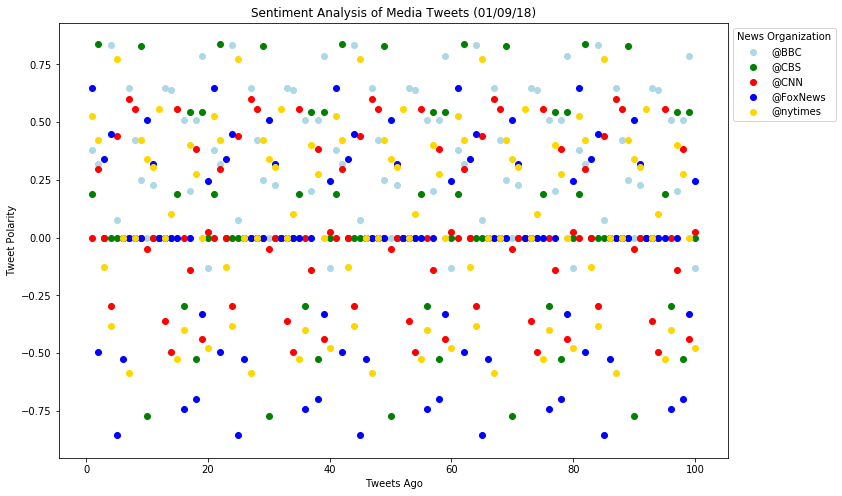

In [4]:
# This code block produces the aggregate scatter plot of all tweets by the 5 news outlets of interest.
#
# Set various high-level parameters of the scatter plot
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(bbox_to_anchor=(1, 1), title='News Organization', fontsize='medium')
# Save the final plot and display it to the user
plt.savefig("NewsOutletSentiment_detailed.png")
plt.show()

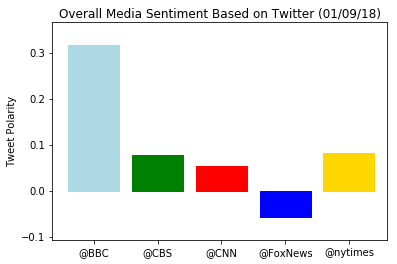

In [5]:
# This code block produces a bar chart of the overall/average sentiment of all the tweets for each of the
#   5 news outlets of interest.
# The average compound score for each news outlet was saved in avg_compound_score list, in the code block above.
#
x_axis = np.arange(len(avg_compound_score))
barchart = plt.bar(x_axis, avg_compound_score, align="edge")
for i in range(len(outlet_color)): barchart[i].set_color(outlet_color[i])

# Set various high-level parameters of the bar chart
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, target_outlets)
plt.xlim(-0.25, len(x_axis))
plt.ylim (min(avg_compound_score)-0.05, max(avg_compound_score)+0.05)
plt.title("Overall Media Sentiment Based on Twitter (%s)" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
# Save the final plot and display it to the user
plt.savefig("NewsOutletSentiment_overall.png")
plt.show()